# Exercício 2

**Aluno:** Rafael Lúcio Negrão Cordeiro<br/>
**Matrícula:** 201310323<br/>
**Disciplina:** CET961 - Engenharia Assistida por Computador

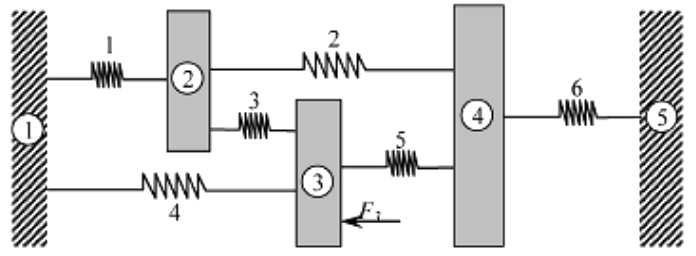

In [1]:
k1 = 500 # N / mm
k2 = 400 # N / mm
k3 = 600 # N / mm
k4 = 200 # N / mm
k5 = 400 # N / mm
k6 = 300 # N / mm

f3 = 1000 # N

u1 = u5 = 0

u1 = u4 = 0 # Unidade de deslocamento

#### Compondo o sistema na notaçao matricial $[K^{(g)}]\{U^{(g)}\} = \{F^{(g)}\}$, temos:

$$
\overbrace{
    \begin{bmatrix}
        k_1 + k_4 & -k_1 & -k_4 & 0 & 0\\
        -k_1 & k_1 + k_2 + k_3 & -k_3 & -k_2 & 0\\
        -k_4 & -k_3 & k_3 + k_4 + k_5 & -k_5 & 0\\
        0 & -k_2 & -k_5 & k_2 + k_5 + k_6 & -k_6\\
        0 & 0 & 0 & -k_6 & k_6
    \end{bmatrix}
}^{[K^{(g)}]}
\overbrace{
    \begin{Bmatrix}
        u_1\\
        u_2\\
        u_3\\
        u_4\\
        u_5
    \end{Bmatrix}
}^{\{U^{(g)}\}}
=
\overbrace{
    \begin{Bmatrix}
        f_1\\
        f_2\\
        f_3\\
        f_4\\
        f_5
    \end{Bmatrix}
}^{\{F^{(g)}\}}
$$

Onde, considerando que queremos apenas os deslocamentos dos corpos e as forças nas paredes, temos:

$$
\begin{bmatrix}
    700 & -500 & -200 & 0 & 0\\
    -500 & 1500 & -600 & -400 & 0\\
    -200 & -600 & 1200 & -400 & 0\\
    0 & -400 & -400 & 1100 & -300\\
    0 & 0 & 0 & -300 & 300
\end{bmatrix}
\begin{Bmatrix}
    0\\
    u_2\\
    u_3\\
    u_4\\
    0
\end{Bmatrix}
=
\begin{Bmatrix}
    R_1\\
    0\\
    1000\\
    0\\
    R_5
\end{Bmatrix}
$$

#### Ao executar as multiplicações das matrizes, temos:
$$
\begin{equation}
    \begin{cases}
        -500u_2 - 200u_3 = R_1\\
        1500u_2 - 600u_3 - 400u_4 = 0\\
        -600u_2 + 1200u_3 - 400u_4 = 1000\\
        -400u_2 - 400u_3 + 1100u_4= 0\\
        -300u_4 = R5
    \end{cases}
\end{equation}
$$

Se isolarmos todas as variáveis para o lado esquerdo da equaçao, teremos: $ \begin{equation}
    \begin{cases}
        -500u_2 - 200u_3 + 0u_4 - R_1 + 0R_5 = 0\\
        1500u_2 - 600u_3 - 400u_4 + 0R_1 + 0R_5 = 0\\
        -600u_2 + 1200u_3 - 400u_4 + 0R_1 + 0R_5 = 1000\\
        -400u_2 - 400u_3 + 1100u_4 + 0R_1 - 0R_5 = 0\\
        0u_2 + 0u_3 -300u_4 + 0R_1 - R_5 = 0
    \end{cases}
\end{equation} $

Da algebra linear, verifica-se que pode-se resolver um sistema de 4 equaçoes com 4 variáveis com uma matriz de seus coeficientes:

$$
\begin{bmatrix}
    -500 & -200 & 0 & -1 & 0\\
    1500 & -600 & -400 & 0 & 0\\
    -600 & 1200 & -400 & 0 & 0\\
    -400 & -400 & 1100 & 0 & 0\\
    0 & 0 & -300 & 0 & -1
\end{bmatrix}
\begin{bmatrix}
    u_2\\
    u_3\\
    u_4\\
    R_1\\
    R_5
\end{bmatrix}
=
\begin{bmatrix}
    0\\
    0\\
    1000\\
    0\\
    0
\end{bmatrix}
$$

Existe uma biblioteca no python dedicada a resolver equações organizadas na forma matricial acima. No pacote numpy, módulo de algebra linear. O código a seguir criará os vetores da matriz acima e executará o módulo de algebra linear do numpy, já entregando os resultados.

In [4]:
import numpy as np

# coeffs de coeficientes
coeffs = [[-500, -200,    0, -1,  0],
          [1500, -600, -400,  0,  0],
          [-600, 1200, -400,  0,  0],
          [-400, -400, 1100,  0,  0],
          [   0,    0, -300,  0, -1]]

# image de conjunto imagem de uma função
image = [0, 0, 1000, 0, 0]

# Transformando os vetores nativos python em vetores numpy
coeffs = np.array(coeffs)
image = np.array(image)

In [5]:
# Visualizando o conteúdo dos vetores

coeffs, image

(array([[-500, -200,    0,   -1,    0],
        [1500, -600, -400,    0,    0],
        [-600, 1200, -400,    0,    0],
        [-400, -400, 1100,    0,    0],
        [   0,    0, -300,    0,   -1]]),
 array([   0,    0, 1000,    0,    0]))

In [6]:
# Resolvendo ele com o módulo de álgebra linear

variaveis = np.linalg.solve(coeffs, image)

print('Os resultados são: u2 = %.2em, u3 = %.2em, u4 = %.2em, f1 = %.2eN e f5 = %.2eN' % tuple(variaveis))

Os resultados são: u2 = 8.54e-01m, u3 = 1.55e+00m, u4 = 8.75e-01m, f1 = -7.38e+02N e f5 = -2.62e+02N
